# ASLprep

**Author:** Steffen Bollmann

**Citation:**

__ASLPrep:__
- Adebimpe, A., Bertolero, M., Dolui, S. et al. ASLPrep: a platform for processing of arterial spin labeled MRI and quantification of regional brain perfusion. Nat Methods 19, 683–686 (2022). [https://doi.org/10.1038/s41592-022-01458-7](https://doi.org/10.1038/s41592-022-01458-7)

__Opensource Data from OpenNeuro:__

- Alvaro Galiano and Reyes Garcia de Eulate and Marta Vidorreta and Miriam Recio and Mario Riverol and José L. Zubieta and Maria A. Fernandez-Seara PhD (2021). Resting State Perfusion in Healthy Aging. OpenNeuro Dataset ds000240.[doi: 10.18112/openneuro.ds000240.v2.0.0](https://openneuro.org/datasets/ds000240/versions/2.0.0)

### Output CPU information:

In [ ]:
!cat /proc/cpuinfo | grep 'vendor' | uniq
!cat /proc/cpuinfo | grep 'model name' | uniq

vendor_id	: AuthenticAMD
model name	: AMD EPYC-Rome Processor


## Run aslprep

In [ ]:
# load fmriprep
import module
import os
await module.load('aslprep/0.7.2')
await module.list()

['aslprep/0.7.2']

In [4]:
# Request a freesurfer license and store it in your homedirectory. This is just an exampe - please replace with your license id:
!echo "Steffen.Bollmann@cai.uq.edu.au" > ~/.license
!echo "21029" >> ~/.license
!echo "*Cqyn12sqTCxo" >> ~/.license
!echo "FSxgcvGkNR59Y" >> ~/.license

In [5]:
# download data using datalad
!datalad install https://github.com/OpenNeuroDatasets/ds000240.git
!cd ds000240 && datalad get sub-01

Cloning:   0%|                             | 0.00/2.00 [00:00<?, ? candidates/s]
Enumerating: 0.00 Objects [00:00, ? Objects/s]
                                              
Counting:   0%|                              | 0.00/1.20k [00:00<?, ? Objects/s]
                                                                                
Compressing:   0%|                             | 0.00/883 [00:00<?, ? Objects/s]
                                                                                
Receiving:   0%|                             | 0.00/2.39k [00:00<?, ? Objects/s]
                                                                                
Resolving:   0%|                                | 0.00/256 [00:00<?, ? Deltas/s]
[INFO   ] scanning for unlocked files (this may take some time)                 
[INFO   ] Remote origin not usable by git-annex; setting annex-ignore 
[INFO   ] access to 1 dataset sibling s3-PRIVATE not auto-enabled, enable with:
| 		datalad siblings -d "/

In [ ]:
%%bash
# aslprep data/bids_root/ out/ participant -w work/
aslprep ds000240 \
   aslprep-output \
   participant \
   --participant-label 01 \
   --fs-license-file ~/.license \
   -w aslprep-work

bids-validator@1.14.5


(node:14285) Warning: Closing directory handle on garbage collection
(Use `node --trace-warnings ...` to show where the warning was created)


This dataset appears to be BIDS compatible.
        Summary:                  Available Tasks:        Available Modalities: 
        133 Files, 17.76MB                                MRI                   
        63 - Subjects                                                           
        1 - Session                                                             


	If you have any questions, please post on https://neurostars.org/tags/bids.
241015-23:33:33,303 nipype.workflow IMPORTANT:
	 Running ASLPrep version 0.7.2

         License NOTICE ##################################################
         ASLPrep 0.7.2
         Copyright 2023 The PennLINC Team and the NiPreps Developers.
         
         This product is primarily developed by the PennLINC team,
         but it is also a part of the NiPreps community.
         
         This product includes software developed by
         the NiPreps Community (https://nipreps.org/).
         
         Portions of this software were dev

## aslprep Results

The full result report is in aslprep-output/sub-01.html and you can open this webpage in Jupyterlab or in the browser. Here a few items from the report as an example and for a quick checking:

### Brain mask and brain tissue segmentation of the T1w
This panel shows the template T1-weighted image (if several T1w images were found), with contours delineating the detected brain mask and brain tissue segmentations.

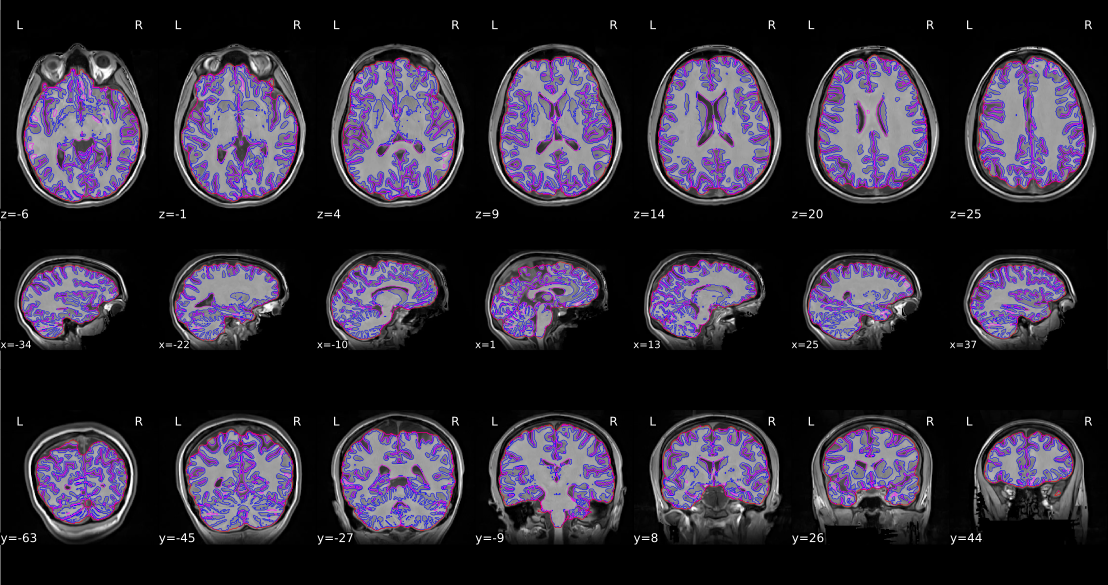

In [4]:
from IPython.core.display import SVG
SVG(filename='aslprep-output/sub-01/figures/sub-01_dseg.svg')

### Spatial normalization of the anatomical T1w reference

Results of nonlinear alignment of the T1w reference one or more template space(s)

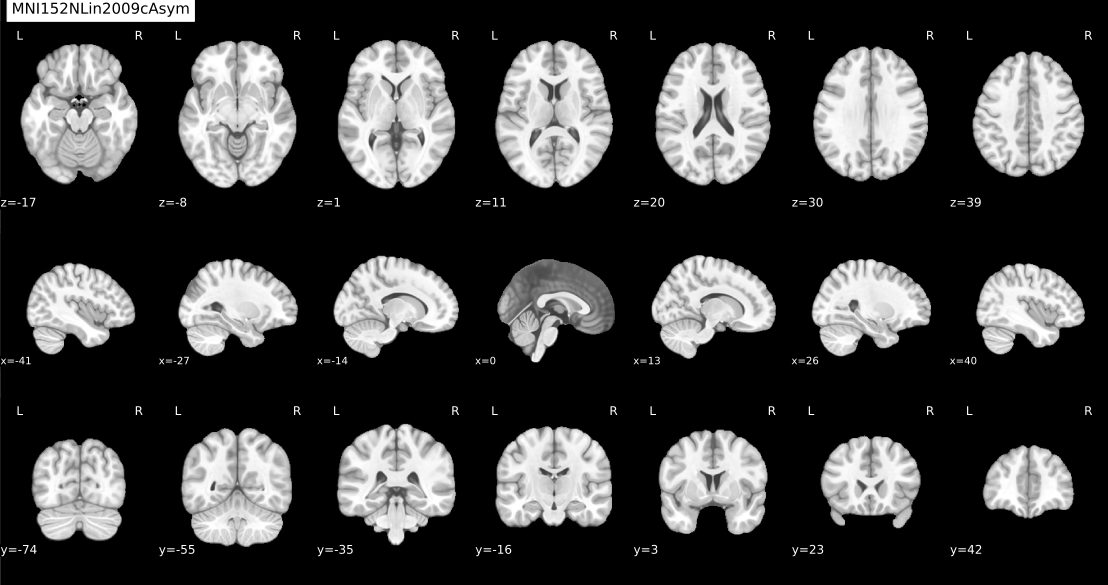

In [5]:
from IPython.core.display import SVG
SVG(filename='aslprep-output/sub-01/figures/sub-01_space-MNI152NLin2009cAsym_T1w.svg')

### Surface reconstruction
Surfaces (white and pial) reconstructed with FreeSurfer (recon-all) overlaid on the participant's T1w template.

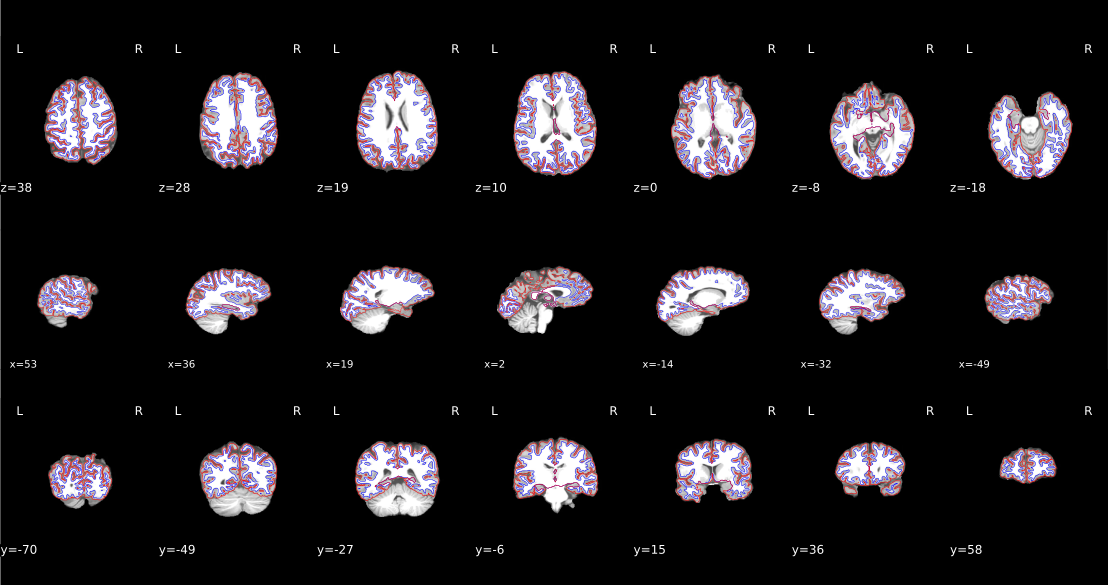

In [6]:
from IPython.core.display import SVG
SVG(filename='aslprep-output/sub-01/figures/sub-01_desc-reconall_T1w.svg')

## Alignment of functional and anatomical MRI data (volume based)
mri_coreg (FreeSurfer) was used to generate transformations from EPI space to T1 Space - bbregister refinement rejected. Note that Nearest Neighbor interpolation is used in the reportlets in order to highlight potential spin-history and other artifacts, whereas final images are resampled using Lanczos interpolation.

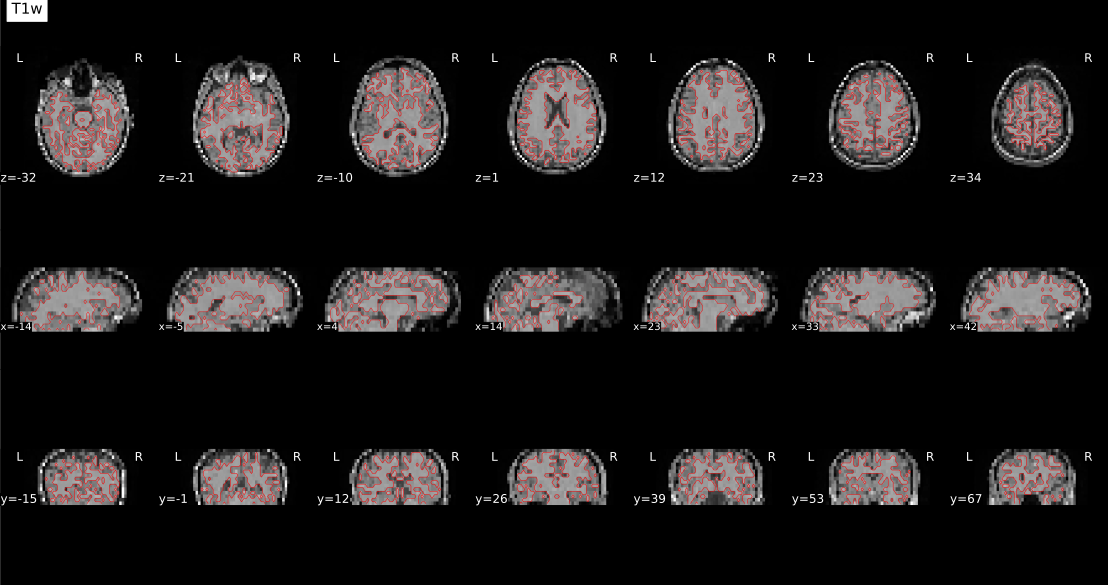

In [7]:
from IPython.core.display import SVG
SVG(filename='aslprep-output/sub-01/figures/sub-01_desc-coreg_asl.svg')

### ASL Summary
Summary statistics are plotted, which may reveal trends or artifacts in the ASL data. DVARS and FD show the standardized DVARS and framewise-displacement measures for each time point. A carpet plot shows the time series for all voxels within the brain mask. Voxels are grouped into cortical (blue), and subcortical (orange) gray matter, cerebellum (green) and white matter and CSF (red), indicated by the color map on the left-hand side.

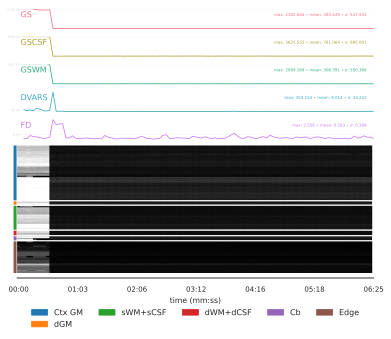

In [8]:
from IPython.core.display import SVG
SVG(filename='aslprep-output/sub-01/figures/sub-01_desc-carpetplot_asl.svg')

### CBF
The maps plot cerebral blood flow (CBF) for basic CBF. The unit is mL/100 g/min.

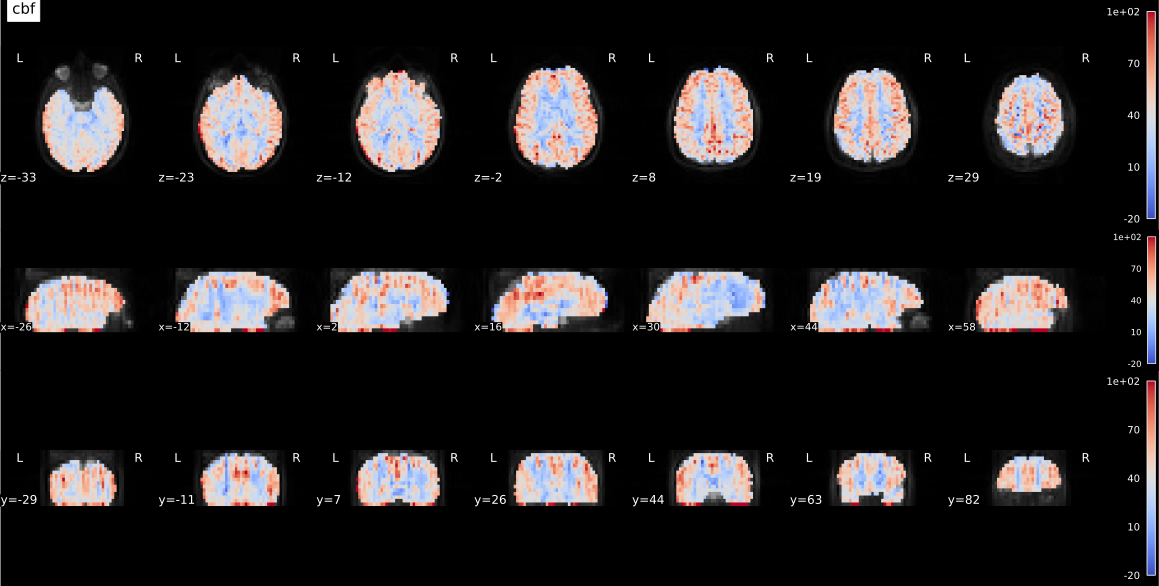

In [9]:
from IPython.core.display import SVG
SVG(filename='aslprep-output/sub-01/figures/sub-01_desc-cbf_cbf.svg')